Figures saved to:
- /home/hp/nayanika/github/GPX6/figures/JACS_publication_energy_landscape.png


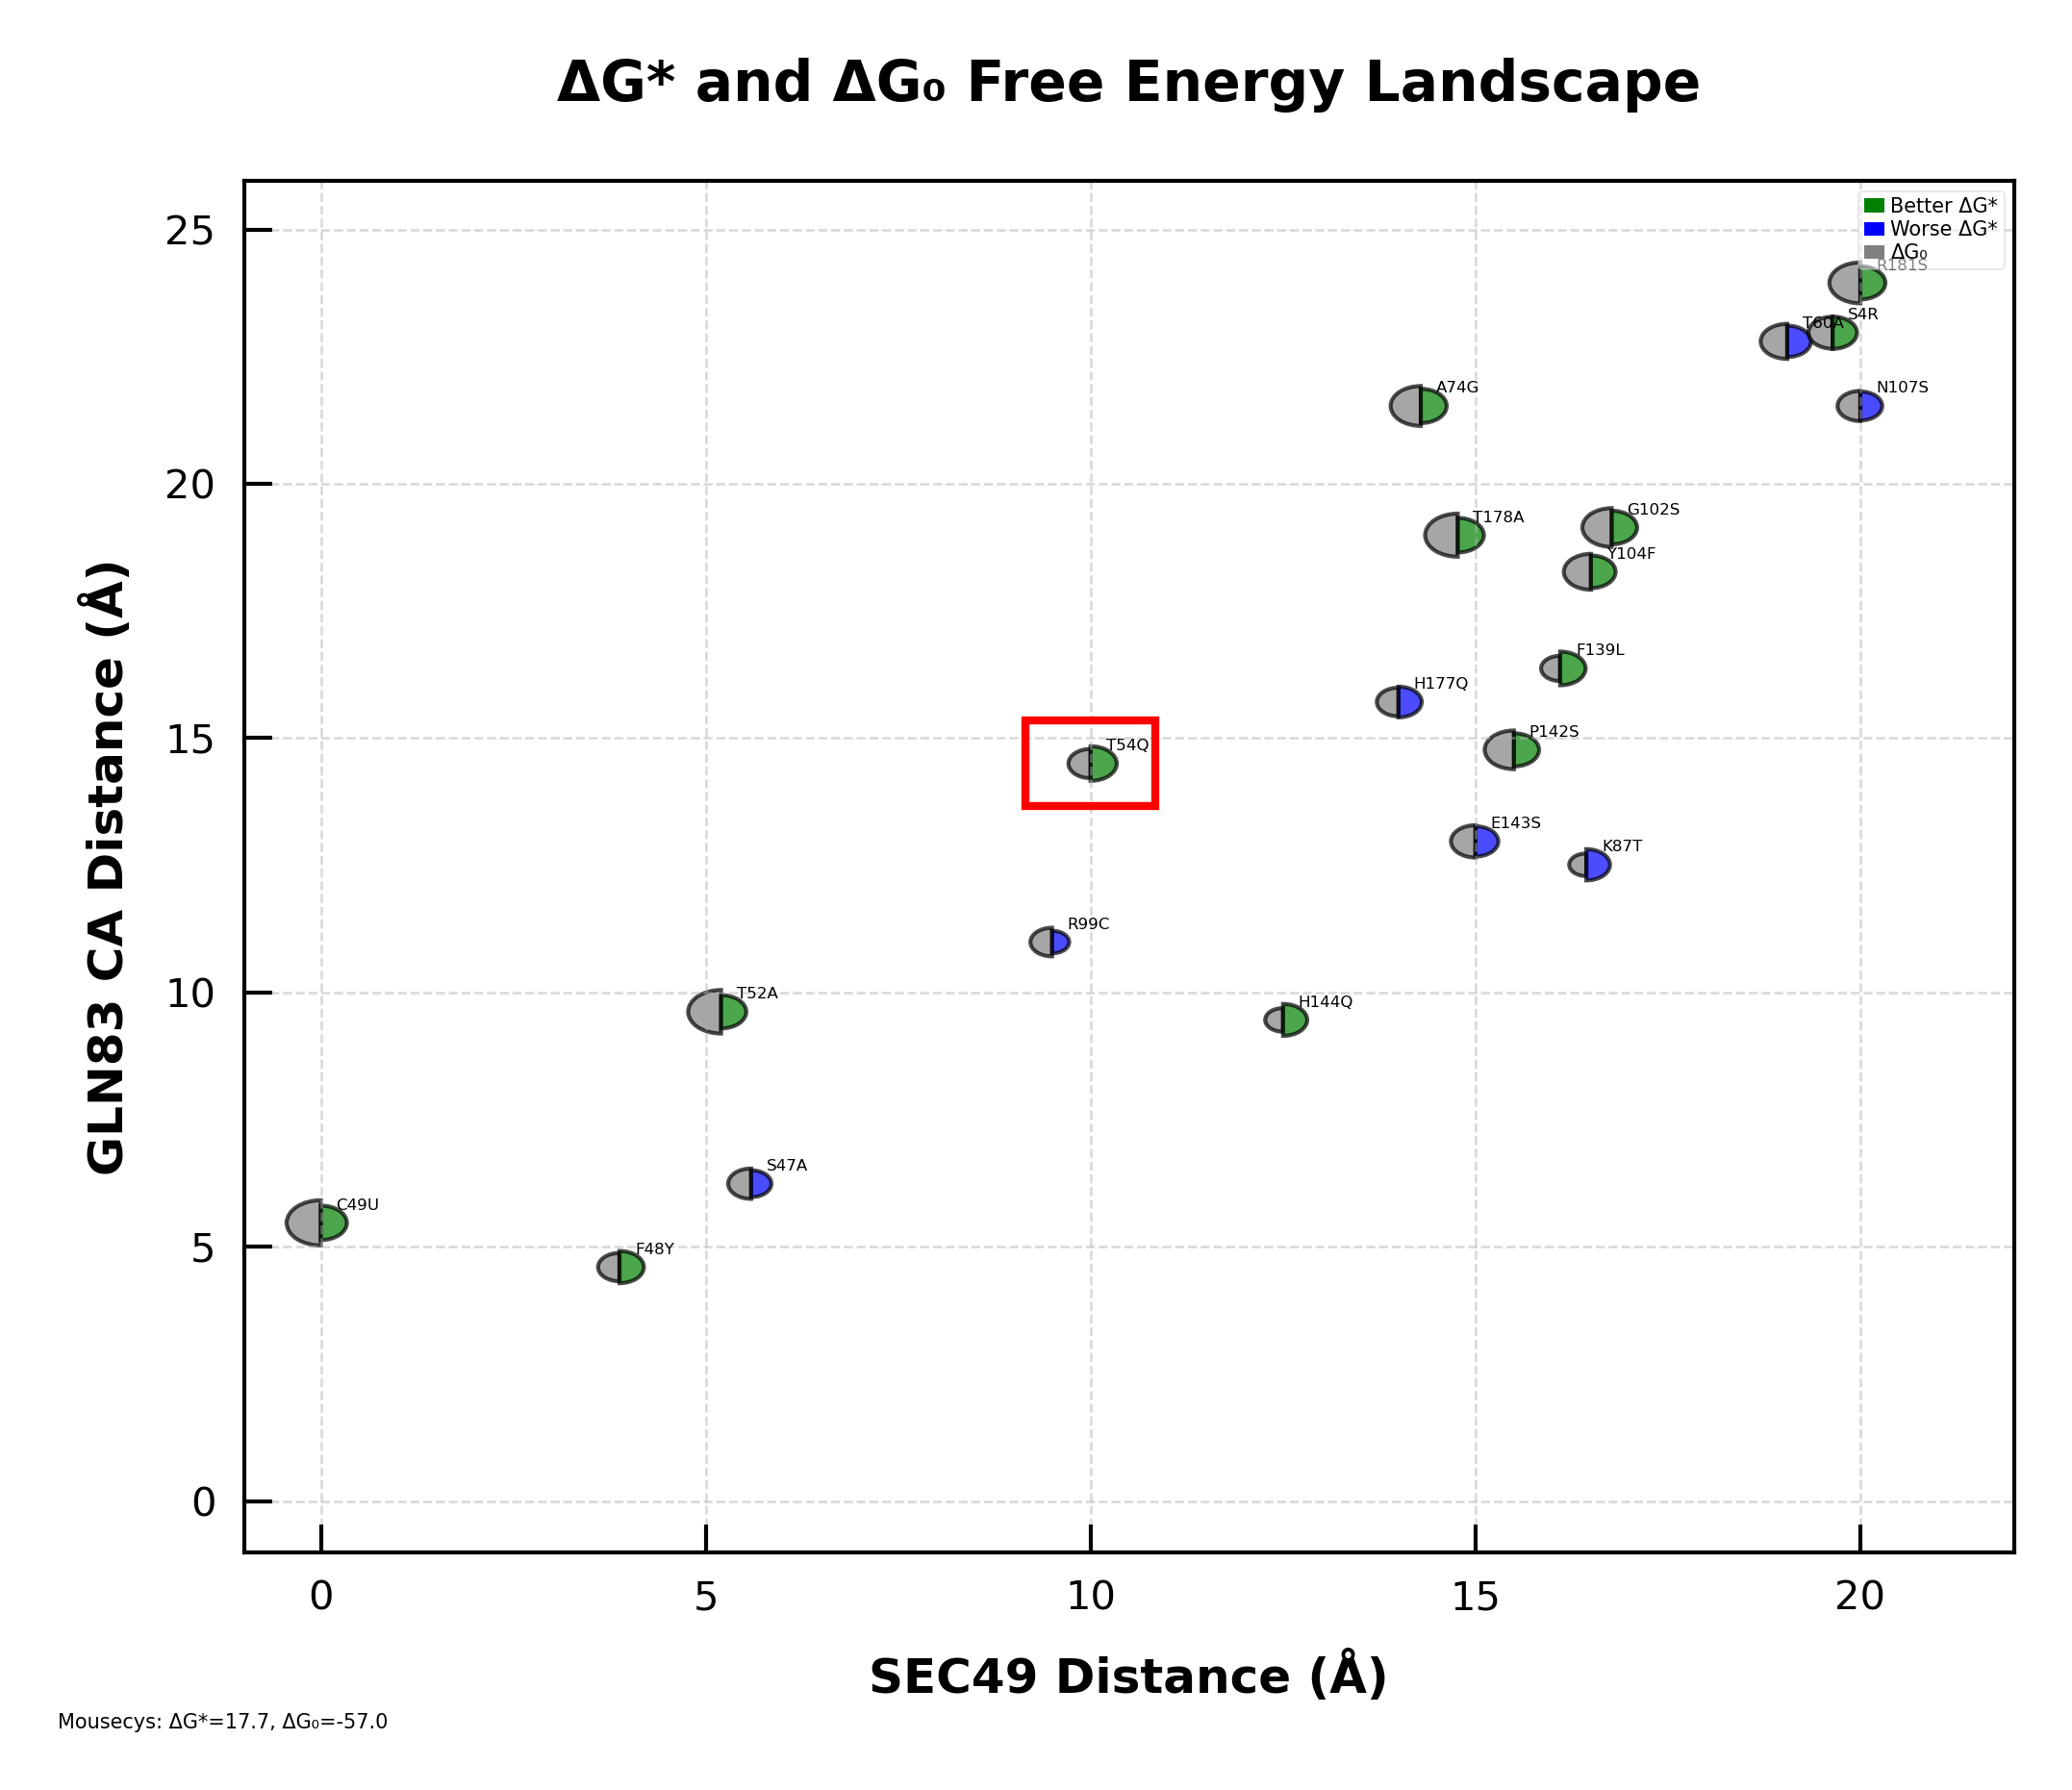

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib import rcParams
import os

# Set publication-quality parameters with system font fallback
rcParams['font.family'] = ['sans-serif']  # Fallback to system sans-serif fonts
rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Helvetica', 'Liberation Sans']
rcParams['font.size'] = 5  # Small base font size
rcParams['axes.linewidth'] = 0.5
rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'

# Define save path
save_dir = "/home/hp/nayanika/github/GPX6/figures"
# Ensure directory exists
os.makedirs(save_dir, exist_ok=True)

# Define dataset with distances and free energy values
mutants = [
    {"name": "C49U", "sec49_distance": 0.0, "ca_distance": 5.47, "dg_star": 14.84, "dg0": -62.60},
    {"name": "F48Y", "sec49_distance": 3.88, "ca_distance": 4.60, "dg_star": 17.38, "dg0": -55.26},
    {"name": "S47A", "sec49_distance": 5.59, "ca_distance": 6.24, "dg_star": 21.57, "dg0": -56.18},
    {"name": "T52A", "sec49_distance": 5.20, "ca_distance": 9.62, "dg_star": 16.16, "dg0": -61.77},
    {"name": "R99C", "sec49_distance": 9.50, "ca_distance": 10.99, "dg_star": 24.29, "dg0": -55.41},
    {"name": "T54Q", "sec49_distance": 10.00, "ca_distance": 14.50, "dg_star": 14.62, "dg0": -55.68},
    {"name": "H144Q", "sec49_distance": 12.50, "ca_distance": 9.46, "dg_star": 17.66, "dg0": -53.40},
    {"name": "H177Q", "sec49_distance": 14.00, "ca_distance": 15.71, "dg_star": 18.66, "dg0": -55.40},
    {"name": "T178A", "sec49_distance": 14.77, "ca_distance": 18.99, "dg_star": 14.77, "dg0": -61.57},
    {"name": "E143S", "sec49_distance": 15.00, "ca_distance": 12.97, "dg_star": 19.04, "dg0": -57.10},
    {"name": "P142S", "sec49_distance": 15.50, "ca_distance": 14.77, "dg_star": 16.30, "dg0": -59.56},
    {"name": "F139L", "sec49_distance": 16.10, "ca_distance": 16.37, "dg_star": 15.72, "dg0": -54.00},
    {"name": "Y104F", "sec49_distance": 16.50, "ca_distance": 18.27, "dg_star": 16.94, "dg0": -58.41},
    {"name": "K87T", "sec49_distance": 16.44, "ca_distance": 12.51, "dg_star": 18.21, "dg0": -53.05},
    {"name": "G102S", "sec49_distance": 16.77, "ca_distance": 19.14, "dg_star": 15.83, "dg0": -59.61},
    {"name": "T60A", "sec49_distance": 19.05, "ca_distance": 22.80, "dg_star": 18.09, "dg0": -58.09},
    {"name": "R181S", "sec49_distance": 20.00, "ca_distance": 23.95, "dg_star": 16.38, "dg0": -60.55},
    {"name": "S4R", "sec49_distance": 19.64, "ca_distance": 22.97, "dg_star": 17.37, "dg0": -56.97},
    {"name": "N107S", "sec49_distance": 20.00, "ca_distance": 21.53, "dg_star": 20.05, "dg0": -56.09},
    {"name": "A74G", "sec49_distance": 14.29, "ca_distance": 21.53, "dg_star": 15.06, "dg0": -60.08},
]

# Mousecys reference values (thresholds)
mousecys_dg_star = 17.68
mousecys_dg0 = -56.96

# Extract distances and values
sec49_distances = [m["sec49_distance"] for m in mutants]
ca_distances = [m["ca_distance"] for m in mutants]
dg_star_values = [m["dg_star"] for m in mutants]
dg0_values = [m["dg0"] for m in mutants]
mutant_labels = [m["name"] for m in mutants]

# Define size ranges for both halves
min_size_small = 400  
max_size_small = 800  
min_size_large = 800  
max_size_large = 1600  

# Calculate normalized sizes for dg_star (lower is better)
dg_star_sizes = []
for dg in dg_star_values:
    if dg < mousecys_dg_star:  # Better than threshold (lower ΔG*)
        normalized = 1 - (dg / mousecys_dg_star)
        size = min_size_large + normalized * (max_size_large - min_size_large)
    else:  
        normalized = min(1, (dg - mousecys_dg_star) / (max(dg_star_values) - mousecys_dg_star))
        size = max_size_small - normalized * (max_size_small - min_size_small)
    dg_star_sizes.append(size)

# Calculate normalized sizes for dg0 (more negative is better)
dg0_sizes = []
for dg in dg0_values:
    if dg < mousecys_dg0:  # Better than threshold (more negative ΔG₀)
        normalized = min(1, (mousecys_dg0 - dg) / (mousecys_dg0 - min(dg0_values)))
        size = min_size_large + normalized * (max_size_large - min_size_large)
    else:  
        normalized = min(1, (dg - mousecys_dg0) / (max(dg0_values) - mousecys_dg0))
        size = max_size_small - normalized * (max_size_small - min_size_small)
    dg0_sizes.append(size)

# Define colors for ΔG*
colors_dg_star = []
colors_dg0 = []
for i, m in enumerate(mutants):
    if m["name"] == "mousecys":
        colors_dg_star.append("magenta")  # Distinct color for wildtype
        colors_dg0.append("magenta")
    else:
        colors_dg_star.append("green" if dg_star_values[i] < mousecys_dg_star else "blue")
        colors_dg0.append("grey")

# Create plot - WIDER ASPECT RATIO (5.0 width x 3.0 height)
fig, ax = plt.subplots(figsize=(3.5, 3.0), dpi=600)

# Get T54Q position and dimensions
t54q_idx = next(i for i, m in enumerate(mutants) if m["name"] == "T54Q")
t54q_x = sec49_distances[t54q_idx]
t54q_y = ca_distances[t54q_idx]
t54q_size_star = np.sqrt(dg_star_sizes[t54q_idx]) / 90
t54q_size_dg0 = np.sqrt(dg0_sizes[t54q_idx]) / 90
t54q_max_radius = max(t54q_size_star, t54q_size_dg0)

# Plot half-circles with different sizes for each half
for i, (x, y, dg_star_size, dg0_size) in enumerate(
    zip(sec49_distances, ca_distances, dg_star_sizes, dg0_sizes)
):
    radius_star = np.sqrt(dg_star_size) / 90
    radius_dg0 = np.sqrt(dg0_size) / 90
    
    color_dg0 = colors_dg0[i]  
    color_star = colors_dg_star[i]
    
    wedge_dg0 = mpatches.Wedge(
        center=(x, y), 
        r=radius_dg0, 
        theta1=90, 
        theta2=270, 
        facecolor=color_dg0, 
        alpha=0.7, 
        edgecolor="black", 
        linewidth=0.5
    )
    
    wedge_star = mpatches.Wedge(
        center=(x, y), 
        r=radius_star, 
        theta1=270, 
        theta2=90, 
        facecolor=color_star, 
        alpha=0.7, 
        edgecolor="black", 
        linewidth=0.5
    )
    
    ax.add_patch(wedge_dg0)
    ax.add_patch(wedge_star)

# Add box around T54Q
padding = 0.5  # Padding around the T54Q mutant
box_width = t54q_max_radius * 2 + padding * 2
box_height = t54q_max_radius * 2 + padding * 2
box = mpatches.Rectangle(
    xy=(t54q_x - t54q_max_radius - padding, t54q_y - t54q_max_radius - padding),
    width=box_width,
    height=box_height,
    edgecolor='red',
    facecolor='none',
    linewidth=1.0,
    linestyle='-',
    zorder=10  # Ensure the box is drawn on top of other elements
)
ax.add_patch(box)

# Labels & Titles
ax.set_xlabel("SEC49 Distance (Å)", fontsize=6, fontweight="bold")
ax.set_ylabel("GLN83 CA Distance (Å)", fontsize=6, fontweight="bold")
ax.set_title("ΔG* and ΔG₀ Free Energy Landscape", fontsize=7, fontweight="bold", pad=10)

# Adjust axis limits - extend x-axis to make plot wider
ax.set_xlim(-1, max(sec49_distances) + 2)
ax.set_ylim(-1, max(ca_distances) + 2)

# Grid with subtle styling for publication
ax.grid(True, linestyle="--", linewidth=0.3, alpha=0.5)

# Add text labels
for sec_dist, ca_dist, label in zip(sec49_distances, ca_distances, mutant_labels):
    ax.text(sec_dist + 0.2, ca_dist + 0.2, label, fontsize=2, ha="left", va="bottom")

# EXTREMELY COMPACT legend for all mutants
legend_patches = [
    mpatches.Patch(facecolor="green", label="Better ΔG*", linewidth=0.3),
    mpatches.Patch(facecolor="blue", label="Worse ΔG*", linewidth=0.3),
    mpatches.Patch(facecolor="grey", label="ΔG₀", linewidth=0.3),
]

# Add a legend for all mutants
leg = ax.legend(
    handles=legend_patches, 
    loc="upper right", 
    fontsize=2.5,  # Super small font
    frameon=True, 
    framealpha=0.5,
    handlelength=1.0,  # Shorter legend keys
    handletextpad=0.3,  # Less space between handle and text
    borderpad=0.3,      # Less border padding
    labelspacing=0.2    # Less space between legend entries
)
leg.get_frame().set_linewidth(0.2)

# Add mousecys threshold annotation - tiny and compact
threshold_text = f"Mousecys: ΔG*={mousecys_dg_star:.1f}, ΔG₀={mousecys_dg0:.1f}"
plt.figtext(0.01, 0.01, threshold_text, fontsize=2.5, ha="left")

# Set aspect ratio to be wider - FORCE 'AUTO' to prevent equal aspect ratio
ax.set_aspect('auto')

# Tighter layout for publication
plt.tight_layout()

# Save plot in high resolution to specified directory
png_path = os.path.join(save_dir, "JACS_publication_energy_landscape.png")

plt.savefig(png_path, dpi=600, bbox_inches="tight", transparent=True)

print(f"Figures saved to:")
print(f"- {png_path}")

plt.show()


Figures saved to:
- /home/hp/nayanika/github/GPX6/figures/JACS_publication_energy_landscape.png


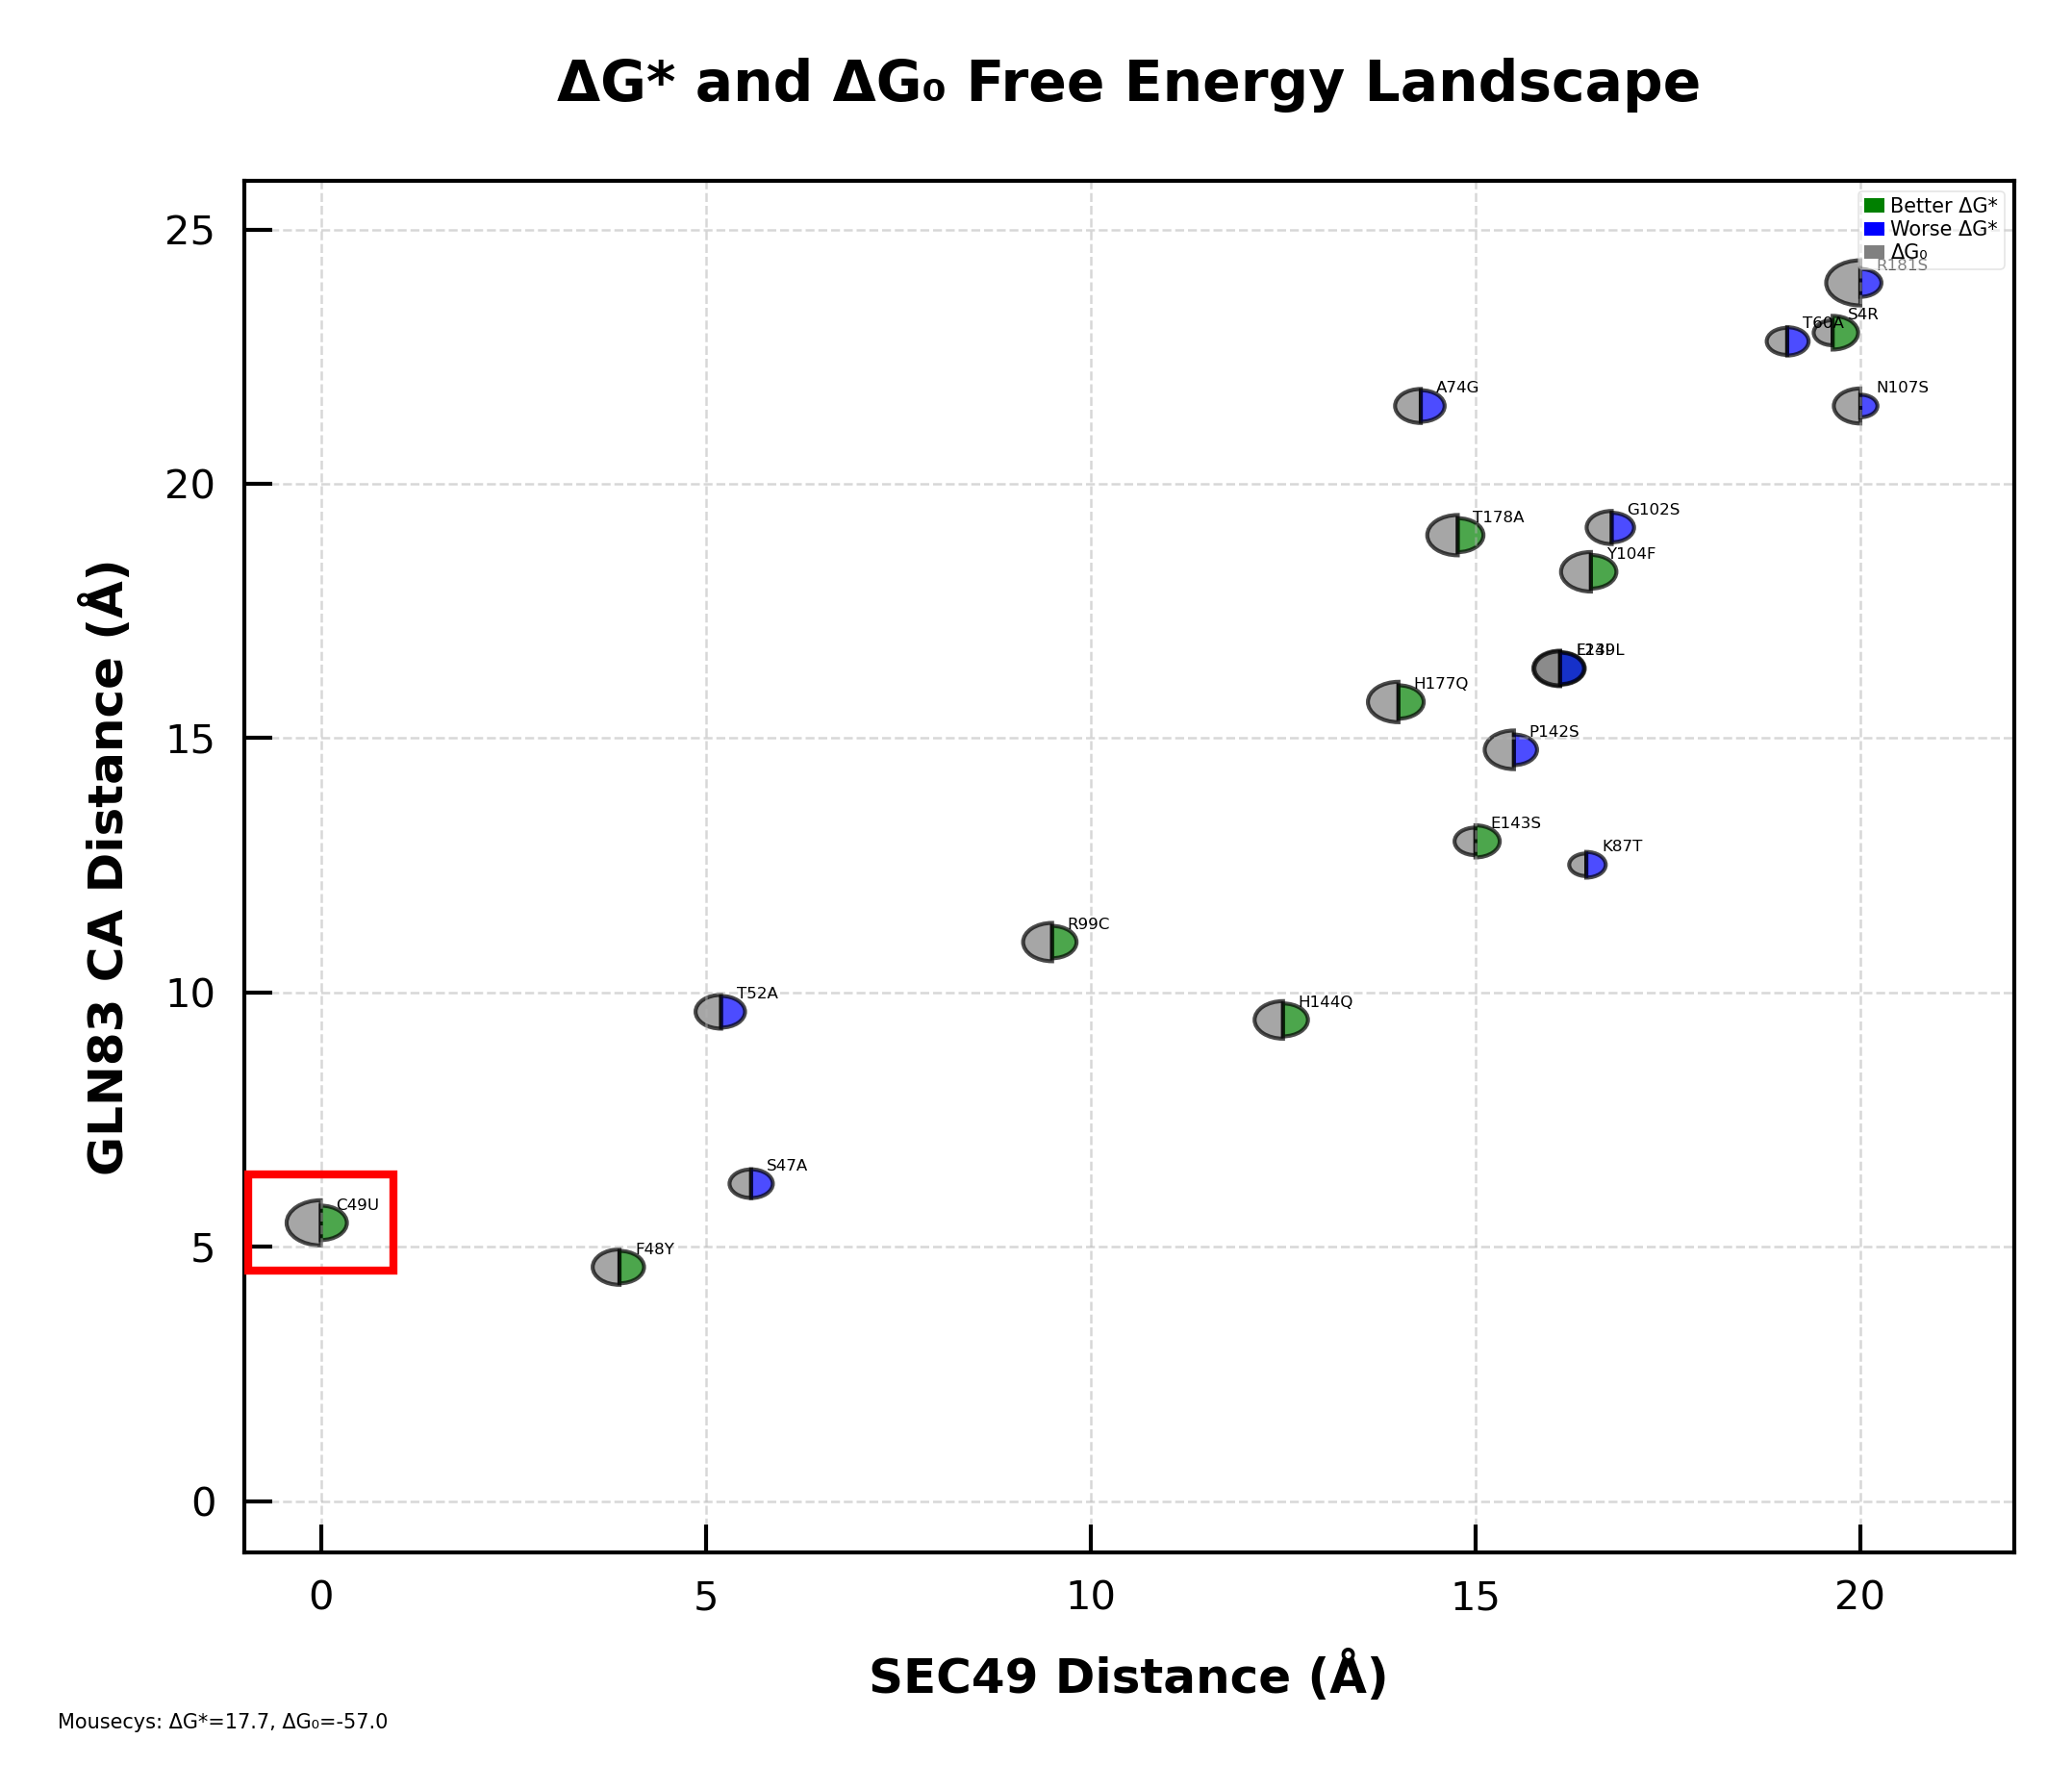

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib import rcParams
import os

# Set publication-quality parameters with system font fallback
rcParams['font.family'] = ['sans-serif']  # Fallback to system sans-serif fonts
rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Helvetica', 'Liberation Sans']
rcParams['font.size'] = 5  # Small base font size
rcParams['axes.linewidth'] = 0.5
rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'

# Define save path
save_dir = "/home/hp/nayanika/github/GPX6/figures"
# Ensure directory exists
os.makedirs(save_dir, exist_ok=True)

# Define dataset with distances and free energy values
mutants = [
    {"name": "C49U", "sec49_distance": 0.0, "ca_distance": 5.47, "dg_star": 14.84, "dg0": -62.60},
    {"name": "F48Y", "sec49_distance": 3.88, "ca_distance": 4.60, "dg_star": 17.16, "dg0": -58.24},
    {"name": "T52A", "sec49_distance": 5.20, "ca_distance": 9.62, "dg_star": 17.83, "dg0": -57.60},
    {"name": "S47A", "sec49_distance": 5.59, "ca_distance": 6.24, "dg_star": 19.07, "dg0": -56.18},
    {"name": "R99C", "sec49_distance": 9.50, "ca_distance": 10.99, "dg_star": 17.29, "dg0": -59.41},
    {"name": "H177Q", "sec49_distance": 14.00, "ca_distance": 15.71, "dg_star": 16.09, "dg0": -60.31},
    {"name": "H144Q", "sec49_distance": 12.50, "ca_distance": 9.46, "dg_star": 16.60, "dg0": -59.10},
    {"name": "T178A", "sec49_distance": 14.77, "ca_distance": 18.99, "dg_star": 15.41, "dg0": -60.28},
    {"name": "A74G", "sec49_distance": 14.29, "ca_distance": 21.53, "dg_star": 17.88, "dg0": -57.70},
    {"name": "E143S", "sec49_distance": 15.00, "ca_distance": 12.97, "dg_star": 17.52, "dg0": -55.99},
    {"name": "F139L", "sec49_distance": 16.10, "ca_distance": 16.37, "dg_star": 17.01, "dg0": -58.28},
    {"name": "K87T", "sec49_distance": 16.44, "ca_distance": 12.51, "dg_star": 20.21, "dg0": -55.05},
    {"name": "P142S", "sec49_distance": 15.50, "ca_distance": 14.77, "dg_star": 18.30, "dg0": -59.56},
    {"name": "G102S", "sec49_distance": 16.77, "ca_distance": 19.14, "dg_star": 18.72, "dg0": -57.37},
    {"name": "Y104F", "sec49_distance": 16.50, "ca_distance": 18.27, "dg_star": 15.75, "dg0": -59.93},
    {"name": "L24I", "sec49_distance": 16.10, "ca_distance": 16.37, "dg_star": 17.88, "dg0": -57.70},
    {"name": "T60A", "sec49_distance": 19.05, "ca_distance": 22.80, "dg_star": 19.22, "dg0": -55.88},
    {"name": "R181S", "sec49_distance": 20.00, "ca_distance": 23.95, "dg_star": 19.38, "dg0": -62.55},
    {"name": "S4R", "sec49_distance": 19.64, "ca_distance": 22.97, "dg_star": 15.73, "dg0": -55.48},
    {"name": "N107S", "sec49_distance": 20.00, "ca_distance": 21.53, "dg_star": 21.25, "dg0": -58.09},
]

# Rest of the code remains the same as in the previous script
# ... (all subsequent code is kept identical to the previous version)

# Mousecys reference values (thresholds)
mousecys_dg_star = 17.68
mousecys_dg0 = -56.96

# Extract distances and values
sec49_distances = [m["sec49_distance"] for m in mutants]
ca_distances = [m["ca_distance"] for m in mutants]
dg_star_values = [m["dg_star"] for m in mutants]
dg0_values = [m["dg0"] for m in mutants]
mutant_labels = [m["name"] for m in mutants]

# Define size ranges for both halves
min_size_small = 400  
max_size_small = 800  
min_size_large = 800  
max_size_large = 1600  

# Calculate normalized sizes for dg_star (lower is better)
dg_star_sizes = []
for dg in dg_star_values:
    if dg < mousecys_dg_star:  # Better than threshold (lower ΔG*)
        normalized = 1 - (dg / mousecys_dg_star)
        size = min_size_large + normalized * (max_size_large - min_size_large)
    else:  
        normalized = min(1, (dg - mousecys_dg_star) / (max(dg_star_values) - mousecys_dg_star))
        size = max_size_small - normalized * (max_size_small - min_size_small)
    dg_star_sizes.append(size)

# Calculate normalized sizes for dg0 (more negative is better)
dg0_sizes = []
for dg in dg0_values:
    if dg < mousecys_dg0:  # Better than threshold (more negative ΔG₀)
        normalized = min(1, (mousecys_dg0 - dg) / (mousecys_dg0 - min(dg0_values)))
        size = min_size_large + normalized * (max_size_large - min_size_large)
    else:  
        normalized = min(1, (dg - mousecys_dg0) / (max(dg0_values) - mousecys_dg0))
        size = max_size_small - normalized * (max_size_small - min_size_small)
    dg0_sizes.append(size)

# Define colors for ΔG*
colors_dg_star = []
colors_dg0 = []
for i, m in enumerate(mutants):
    if m["name"] == "mousecys":
        colors_dg_star.append("magenta")  # Distinct color for wildtype
        colors_dg0.append("magenta")
    else:
        colors_dg_star.append("green" if dg_star_values[i] < mousecys_dg_star else "blue")
        colors_dg0.append("grey")

# Create plot - WIDER ASPECT RATIO (5.0 width x 3.0 height)
fig, ax = plt.subplots(figsize=(3.5, 3.0), dpi=600)

# Get C49U position and dimensions
c49u_idx = next(i for i, m in enumerate(mutants) if m["name"] == "C49U")
c49u_x = sec49_distances[c49u_idx]
c49u_y = ca_distances[c49u_idx]
c49u_size_star = np.sqrt(dg_star_sizes[c49u_idx]) / 90
c49u_size_dg0 = np.sqrt(dg0_sizes[c49u_idx]) / 90
c49u_max_radius = max(c49u_size_star, c49u_size_dg0)

# Plot half-circles with different sizes for each half
for i, (x, y, dg_star_size, dg0_size) in enumerate(
    zip(sec49_distances, ca_distances, dg_star_sizes, dg0_sizes)
):
    radius_star = np.sqrt(dg_star_size) / 90
    radius_dg0 = np.sqrt(dg0_size) / 90
    
    color_dg0 = colors_dg0[i]  
    color_star = colors_dg_star[i]
    
    wedge_dg0 = mpatches.Wedge(
        center=(x, y), 
        r=radius_dg0, 
        theta1=90, 
        theta2=270, 
        facecolor=color_dg0, 
        alpha=0.7, 
        edgecolor="black", 
        linewidth=0.5
    )
    
    wedge_star = mpatches.Wedge(
        center=(x, y), 
        r=radius_star, 
        theta1=270, 
        theta2=90, 
        facecolor=color_star, 
        alpha=0.7, 
        edgecolor="black", 
        linewidth=0.5
    )
    
    ax.add_patch(wedge_dg0)
    ax.add_patch(wedge_star)

# Add box around C49U
padding = 0.5  # Padding around the mutant
box_width = c49u_max_radius * 2 + padding * 2
box_height = c49u_max_radius * 2 + padding * 2
box = mpatches.Rectangle(
    xy=(c49u_x - c49u_max_radius - padding, c49u_y - c49u_max_radius - padding),
    width=box_width,
    height=box_height,
    edgecolor='red',
    facecolor='none',
    linewidth=1.0,
    linestyle='-',
    zorder=10  # Ensure the box is drawn on top of other elements
)
ax.add_patch(box)

# Labels & Titles
ax.set_xlabel("SEC49 Distance (Å)", fontsize=6, fontweight="bold")
ax.set_ylabel("GLN83 CA Distance (Å)", fontsize=6, fontweight="bold")
ax.set_title("ΔG* and ΔG₀ Free Energy Landscape", fontsize=7, fontweight="bold", pad=10)

# Adjust axis limits - extend x-axis to make plot wider
ax.set_xlim(-1, max(sec49_distances) + 2)
ax.set_ylim(-1, max(ca_distances) + 2)

# Grid with subtle styling for publication
ax.grid(True, linestyle="--", linewidth=0.3, alpha=0.5)

# Add text labels
for sec_dist, ca_dist, label in zip(sec49_distances, ca_distances, mutant_labels):
    ax.text(sec_dist + 0.2, ca_dist + 0.2, label, fontsize=2, ha="left", va="bottom")

# EXTREMELY COMPACT legend for all mutants
legend_patches = [
    mpatches.Patch(facecolor="green", label="Better ΔG*", linewidth=0.3),
    mpatches.Patch(facecolor="blue", label="Worse ΔG*", linewidth=0.3),
    mpatches.Patch(facecolor="grey", label="ΔG₀", linewidth=0.3),
]

# Add a legend for all mutants
leg = ax.legend(
    handles=legend_patches, 
    loc="upper right", 
    fontsize=2.5,  # Super small font
    frameon=True, 
    framealpha=0.5,
    handlelength=1.0,  # Shorter legend keys
    handletextpad=0.3,  # Less space between handle and text
    borderpad=0.3,      # Less border padding
    labelspacing=0.2    # Less space between legend entries
)
leg.get_frame().set_linewidth(0.2)

# Add mousecys threshold annotation - tiny and compact
threshold_text = f"Mousecys: ΔG*={mousecys_dg_star:.1f}, ΔG₀={mousecys_dg0:.1f}"
plt.figtext(0.01, 0.01, threshold_text, fontsize=2.5, ha="left")

# Set aspect ratio to be wider - FORCE 'AUTO' to prevent equal aspect ratio
ax.set_aspect('auto')

# Tighter layout for publication
plt.tight_layout()

# Save plot in high resolution to specified directory
png_path = os.path.join(save_dir, "JACS_publication_energy_landscape.png")

plt.savefig(png_path, dpi=600, bbox_inches="tight", transparent=True)

print(f"Figures saved to:")
print(f"- {png_path}")

plt.show()